In [6]:

import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import History
from keras.datasets import cifar10
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from numpy.random import seed
from tensorflow import keras

In [2]:
seed(123)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train < nb_classes)[0]][:n_samples], y_train[np.where(y_train < nb_classes)[0]][
                                                                           :n_samples]
X_test, y_test = X_test[np.where(y_test < nb_classes)[0]], y_test[np.where(y_test < nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train, return_counts=True))
print(X_train[0].shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step
(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
(32, 32, 3)


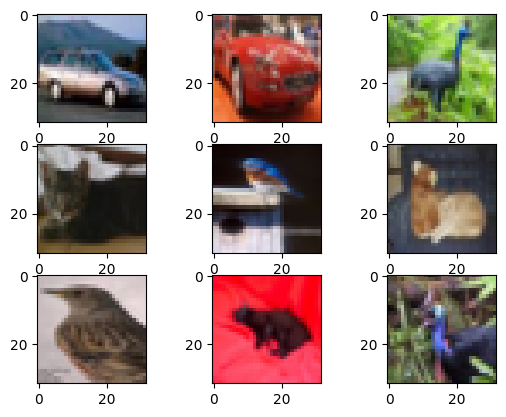

In [5]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

### Normalize

In [5]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

num_classes = y_test.shape[1]
X_train[0].shape

(32, 32, 3)

# Zad 

Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

In [10]:
history = History()

model = Sequential()
model.add(
    Conv2D(6, (5, 5), input_shape=(32, 32, 3), activation='relu'))  # 6 filters, 5x5 => (32-5+1)x(32-5+1)x6 = 28x28x6
model.add(AveragePooling2D(pool_size=(2, 2)))  # 14x14x6
model.add(Conv2D(16, (5, 5), activation='relu'))  # 10x10x16
model.add(AveragePooling2D(pool_size=(2, 2)))  # 5x5x16
model.add(Flatten())  # 400
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, callbacks=[history])

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3593 - loss: 1.2825 - val_accuracy: 0.5943 - val_loss: 0.9503
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6098 - loss: 0.9148 - val_accuracy: 0.6575 - val_loss: 0.8415
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6570 - loss: 0.8198 - val_accuracy: 0.6693 - val_loss: 0.7882
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6656 - loss: 0.7791 - val_accuracy: 0.6935 - val_loss: 0.7553
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6892 - loss: 0.7347 - val_accuracy: 0.7028 - val_loss: 0.7294
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7179 - loss: 0.6991 - val_accuracy: 0.6992 - val_loss: 0.7444
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7237 - loss: 0.6809 - val_accuracy: 0.7075 - val_loss: 0.7413
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7284 - loss: 0.6778 - val_accuracy: 0.7237 - v

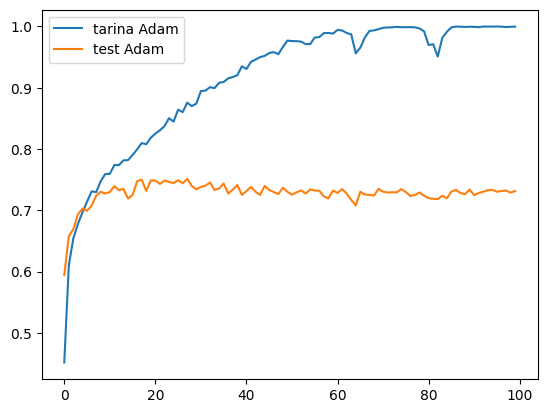

In [13]:
plt.plot(history.history['accuracy'], label="tarina Adam")
plt.plot(history.history['val_accuracy'], label="test Adam")

plt.legend()
plt.show()